<a href="https://colab.research.google.com/github/Verose/ML_Applications_TAU/blob/master/Assignment_1_basic_statistics_and_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Section 1: Data Science

In [2]:
# TODO: Load the flights training data into 'data'
from google.colab import drive
import csv

drive.mount('/content/drive')

flights = '/content/drive/My Drive/Colab Notebooks/ML course/data/flight_delays_train.csv'

data = pd.read_csv(flights)
# remove rows in which the departure time is invalid i.e. > 2400
data = data.drop(data[data.DepTime > 2400].index)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# TODO: How many flights got delayed at Charlotte?

CLT_flights = data[data['Origin'] == "CLT"]
delayed = (CLT_flights['dep_delayed_15min'] == 'Y').sum()
delayed

288

In [0]:
# TODO: Show the number of departures per hour-of-day

# You are adviced to use 'groupby'. More info can be found here:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

hours = data['DepTime'] // 100
bins = list(range(0, 25))
data['DepTime_binned'] = pd.cut(hours, bins, right=False)
dep_num_by_hour = data.groupby(["DepTime_binned"]).size().reset_index(name='counts')
dep_num_by_hour

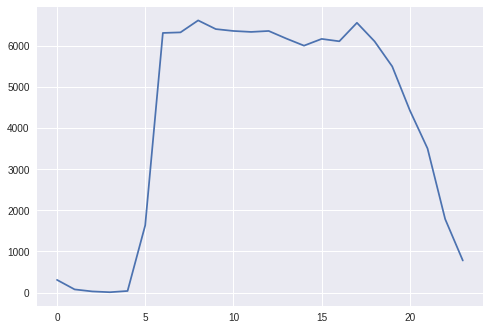

In [29]:
# TODO: Plot number of departures (Y axis) per hour-of-day (X axis)

x_axis = dep_num_by_hour["DepTime_binned"].cat.codes
y_axis = dep_num_by_hour["counts"]
plt.plot(x_axis, y_axis)

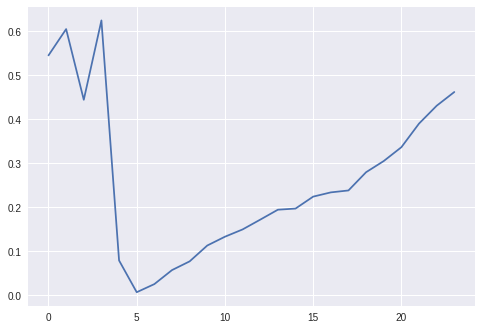

In [38]:
# TODO: Plot the average number of delays per hour-of-day.

# replace Y/N occurences with 1/0 accordingly
data.dep_delayed_15min.replace(('Y', 'N'), (1, 0), inplace=True)
avg_dep_num_by_hour = data.groupby(["DepTime_binned"]).mean().reset_index()
x_axis = avg_dep_num_by_hour["DepTime_binned"].cat.codes
y_axis = avg_dep_num_by_hour["dep_delayed_15min"]
plt.plot(x_axis, y_axis)

# remove this column - finished working with it
data = data.drop(columns=['DepTime_binned'])

In [39]:
# TODO: Find the worse pair of origin and carrier 

# You may want to use 'idxmax' (like argmax, returning the row with max value of specific column)

# pair with most mean distance
data.groupby(["Origin", "UniqueCarrier"]).mean()["Distance"].idxmax()


('HNL', 'CO')

# Section 2: Supervised Learning
Here, you are requested to use all features to predict the response parameter dep_delayed_15min

In [0]:
# TODO: encode all categorical features as one-hot representation

# Month	DayofMonth	DayOfWeek	DepTime	UniqueCarrier	Origin	Dest	Distance	dep_delayed_15min
months = pd.get_dummies(data['Month'], prefix='Month')
days = pd.get_dummies(data['DayofMonth'], prefix='DayofMonth')
week = pd.get_dummies(data['DayOfWeek'], prefix='DayOfWeek')
carrier = pd.get_dummies(data['UniqueCarrier'], prefix='UniqueCarrier')
origin = pd.get_dummies(data['Origin'], prefix='Origin')
dest = pd.get_dummies(data['Dest'], prefix='Dest')
X = pd.concat([data, months, days, week, carrier, origin, dest], axis=1)

X = X.drop(columns=['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'])
#X.head()

In [0]:
# TODO: Split the data to train and test. Use test_size=0.3, and random_state=1 

y = X['dep_delayed_15min']
X = X.drop(columns=['dep_delayed_15min'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [67]:
# TODO: Fit a LogisticRegression classifier to the training set

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
# TODO: print confusion matrix over the testing set

y_hat_test = lr.predict(X_test)
confusion_matrix(y_test, y_hat_test)

array([[24227,    88],
       [ 5543,   137]])

In [69]:
# TODO: Calculate Precision, Recall and F score

from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_hat_test, average='weighted')
print('Precision: {} Recall: {} F score: {}'.format(*scores))

Precision: 0.77500176714283 Recall: 0.8122687114519086 F score: 0.7350235153601458


In [77]:
# TODO: Similarly, print precision/recall for the following classifiers:

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

def calculate_precision_recall_fscore(classifier):
  clf = classifier()
  clf.fit(X_train, y_train)
  y_hat_test = clf.predict(X_test)
  scores = precision_recall_fscore_support(y_test, y_hat_test, average='weighted')
  print('{}: Precision: {} Recall: {} F score: {}'.format(classifier.__name__, *scores))
  #print('Missing: {}'.format(set(y_test) - set(y_hat_test)))

calculate_precision_recall_fscore(BernoulliNB)
calculate_precision_recall_fscore(KNeighborsClassifier)
calculate_precision_recall_fscore(LinearSVC)

BernoulliNB: Precision: 0.7171208173683523 Recall: 0.8078013002167028 F score: 0.7287773126211627
KNeighborsClassifier: Precision: 0.7444361971104461 Recall: 0.7927321220203367 F score: 0.7570330826903091
LinearSVC: Precision: 0.7518285132786471 Recall: 0.8106351058509752 F score: 0.7259185348305586
